## MNIST Dataset 분류기 with Feedforward Neural Networks

* 한림대학교 딥러닝이해및활용 (710231)에 사용된 코드입니다. 

In [3]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [4]:
tf.set_random_seed(777)  # reproducibility

In [5]:
mnist = input_data.read_data_sets("./MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
# parameters
learning_rate = 0.001
training_epochs = 50 #전체 데이터를 50번 학습하겠다
batch_size = 128

In [7]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [8]:
W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

In [9]:
# define cost/loss & optimizer
#cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [10]:
# initialize
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [11]:
vc = []

In [12]:
# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    vc.append(avg_cost)

print('Learning Finished!')

Epoch: 0001 cost = 88976.751497851
Epoch: 0002 cost = 15638.230302575
Epoch: 0003 cost = 6066.288710232
Epoch: 0004 cost = 2585.833369755
Epoch: 0005 cost = 769.606607504
Epoch: 0006 cost = 172.161987296
Epoch: 0007 cost = 76.097515200
Epoch: 0008 cost = 43.119879860
Epoch: 0009 cost = 27.268510890
Epoch: 0010 cost = 18.262731846
Epoch: 0011 cost = 12.482883087
Epoch: 0012 cost = 8.972097479
Epoch: 0013 cost = 6.543458340
Epoch: 0014 cost = 4.683969643
Epoch: 0015 cost = 3.407312404
Epoch: 0016 cost = 2.494176754
Epoch: 0017 cost = 1.833926845
Epoch: 0018 cost = 1.361553345
Epoch: 0019 cost = 1.018971282
Epoch: 0020 cost = 0.731222527
Epoch: 0021 cost = 0.567077257
Epoch: 0022 cost = 0.420134966
Epoch: 0023 cost = 0.313619500
Epoch: 0024 cost = 0.247253000
Epoch: 0025 cost = 0.188454647
Epoch: 0026 cost = 0.166363213
Epoch: 0027 cost = 0.133485222
Epoch: 0028 cost = 0.118757746
Epoch: 0029 cost = 0.107316592
Epoch: 0030 cost = 0.101169263
Epoch: 0031 cost = 0.096477966
Epoch: 0032 cost

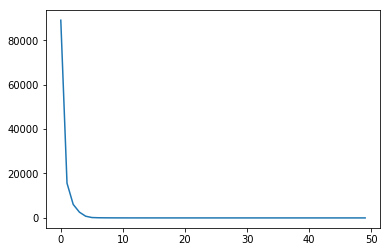

In [14]:
plt.plot(vc)

In [15]:
################################
# 정확도 확인하기
# Test model and check accuracy
pred = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
print (pred.dtype)
accuracy = tf.reduce_mean(tf.cast(pred, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

<dtype: 'bool'>
Accuracy: 0.1134
